## MOVIE RATING PREDICTION MODEL

## Problem Description :
 To predict the IMDb score of movies based on various features such as genre, director, cast, budget, runtime, and production company.


## Dataset Description

This dataset contains information about 7,668 movies, with the following columns:

name: Title of the movie.

rating: Age rating (e.g., PG, R).

genre: Primary genre of the movie (e.g., Drama, Comedy).

year: Release year of the movie.

released: Exact release date, including the country of release.

score: IMDb score of the movie.

votes: Number of votes the movie received on IMDb.

director: Director of the movie.

writer: Writer(s) of the movie.

star: Leading actor/actress of the movie.

country: Country of production.

budget: Budget of the movie (in unspecified currency).

gross: Gross earnings (in unspecified currency).

company: Production company of the movie.

runtime: Runtime of the movie in minutes.

## STEP - 1 : Importing necessary packages, Data cleaning, feature extraction, and outlier handling

In [1]:
# Importing necessary libraries/packages : : 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
# DATA EXTRACTION AND EXPLORATION
d=pd.read_csv("movies.csv")

In [3]:
print("Number of rows :",d.shape[0],", Number of columns :",d.shape[1])

Number of rows : 7668 , Number of columns : 15


In [4]:
# checking dataset columns
for i in d.columns:
    print(i)

name
rating
genre
year
released
score
votes
director
writer
star
country
budget
gross
company
runtime


In [5]:
d.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
d.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [7]:
d.tail(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,NaN,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [8]:
d.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


## DATA PREPROCESSING : Cleaning, removal of outliers, encoding

In [9]:
print(d.isnull().sum())
print("\n\nNumber of rows and columns : ",d.shape)

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


Number of rows and columns :  (7668, 15)


In [10]:
d = d.dropna()
print(d.isnull().sum())
print("\n\nNumber of rows and columns : ",d.shape)

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


Number of rows and columns :  (5421, 15)


## GRAPHICAL ANALYSIS


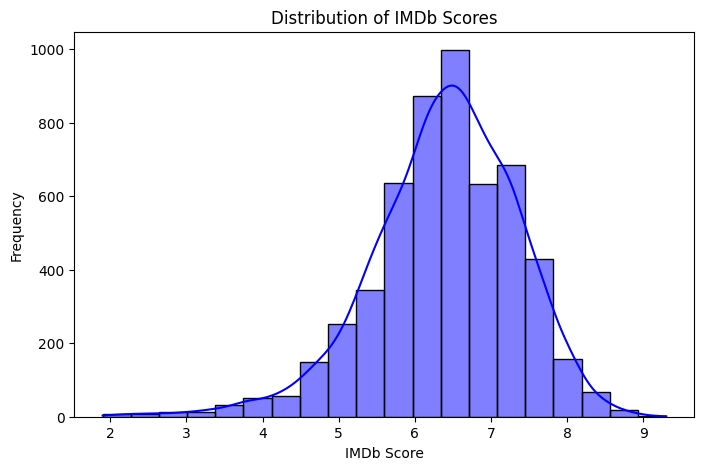

In [11]:
plt.figure(figsize=(8, 5))
sn.histplot(d['score'], bins=20, kde=True, color='blue')
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.title("Distribution of IMDb Scores")
plt.show()

The graph depicts the frequency of IMDB scores, showing most of the movies are rated between 5-7.

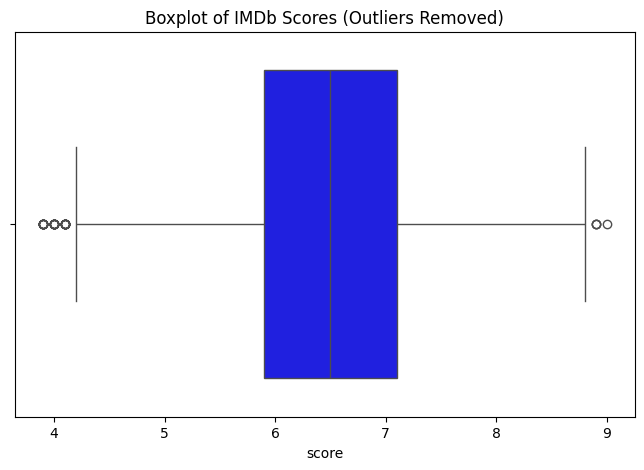

In [12]:
Q1 = d['score'].quantile(0.25)
Q3 = d['score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
d = d[(d['score'] >= lower_bound) & (d['score'] <= upper_bound)]

plt.figure(figsize=(8, 5))
sn.boxplot(x=d['score'], color='blue')
plt.title("Boxplot of IMDb Scores (Outliers Removed)")
plt.show()

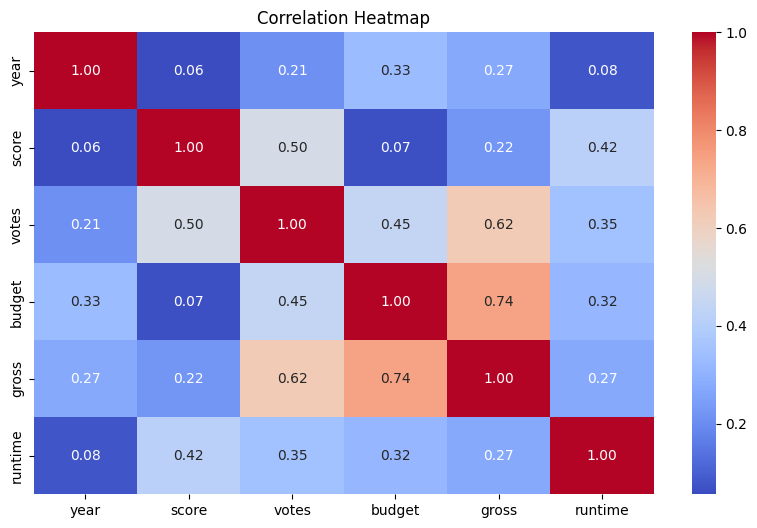

In [13]:
plt.figure(figsize=(10, 6))
sn.heatmap(d.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## MODEL BUILDING : Linear Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
encoder = LabelEncoder()
categorical_columns = ['rating', 'genre', 'director', 'writer', 'star', 'country', 'company']

for col in categorical_columns:
    d[col] = encoder.fit_transform(d[col])  

In [16]:
features = ['rating', 'genre', 'votes', 'director', 'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime']
target = 'score'
X = d[features]
y = d[target]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train[['votes', 'budget', 'gross', 'runtime']] = scaler.fit_transform(X_train[['votes', 'budget', 'gross', 'runtime']])
X_test[['votes', 'budget', 'gross', 'runtime']] = scaler.transform(X_test[['votes', 'budget', 'gross', 'runtime']])


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [22]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")


Mean Absolute Error: 0.5428483287718954
Mean Squared Error: 0.47851507843912594
Root Mean Squared Error: 0.6917478431040649
R-squared Score: 0.3932180869295151


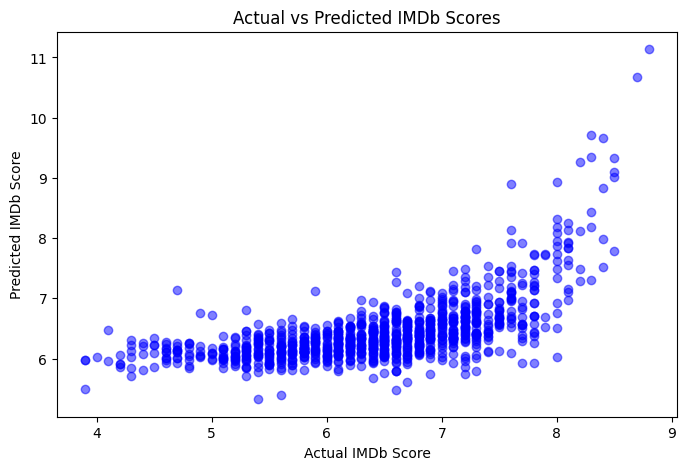

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual IMDb Score")
plt.ylabel("Predicted IMDb Score")
plt.title("Actual vs Predicted IMDb Scores")
plt.show()


## MODEL BUILDING : XGBRegressor Model

In [26]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

d = pd.read_csv("movies.csv").dropna()
d['decade'] = (d['year'] // 10) * 10

num_features = ['votes', 'budget', 'gross', 'runtime']
cat_features = ['rating', 'genre', 'director', 'writer', 'star', 'country', 'company', 'decade']
target = 'score'

X = d[num_features + cat_features]
y = d[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def log_transform(x):
    return np.log1p(x)

preprocessor = ColumnTransformer([
    ('num', FunctionTransformer(log_transform), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n📌 **XGBoost Performance:**")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R² Score: {r2:.4f}")



📌 **XGBoost Performance:**
  MAE: 0.4504
  MSE: 0.3925
  RMSE: 0.6265
  R² Score: 0.5698
